<a href="https://colab.research.google.com/github/swardiantara/fp-dm-2021/blob/main/glove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
#Mount the G Drive to access the data set
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
train_path = '/content/drive/MyDrive/Colab Notebooks/FP-DM/dataset/train.txt'
dev_path = '/content/drive/MyDrive/Colab Notebooks/FP-DM/dataset/dev.txt'
test_path = '/content/drive/MyDrive/Colab Notebooks/FP-DM/dataset/test.txt'

data_train = []
with open(train_path) as fp:
  sentence = 1
  lines = fp.readlines()
  for line in lines:
    if (not line in ["\n", "\r\n"]):
      line_arr = line.split(' ')
      word = line_arr[0]
      pos = line_arr[1]
      tag = line_arr[2].strip()
      data_train.append([sentence, word, pos, tag])
    else:
      sentence += 1
data_train

In [6]:
data_dev = []
with open(dev_path) as fp:
  sentence = 1
  lines = fp.readlines()
  for line in lines:
    if (not line in ["\n", "\r\n"]):
      line_arr = line.split(' ')
      word = line_arr[0]
      pos = line_arr[1]
      tag = line_arr[2].strip()
      data_dev.append([sentence, word, pos, tag])
    else:
      sentence += 1
data_dev

In [8]:
data_test = []
with open(test_path) as fp:
  sentence = 1
  lines = fp.readlines()
  for line in lines:
    if (not line in ["\n", "\r\n"]):
      line_arr = line.split(' ')
      word = line_arr[0]
      pos = line_arr[1]
      tag = line_arr[2].strip()
      data_test.append([sentence, word, pos, tag])
    else:
      sentence += 1
data_test

[[1, 'Presiden', 'PROPN', 'O'],
 [1, 'terpilih', 'VERB', 'O'],
 [1, 'Joko', 'PROPN', 'B-PER'],
 [1, 'Widodo', 'PROPN', 'I-PER'],
 [1, 'mengungkapkan', 'VERB', 'O'],
 [1, 'pihaknya', 'NOUN', 'O'],
 [1, 'tidak', 'PART', 'O'],
 [1, 'akan', 'ADV', 'O'],
 [1, 'membedakan', 'VERB', 'O'],
 [1, 'spesifikasi', 'NOUN', 'O'],
 [1, 'kandidat', 'NOUN', 'O'],
 [1, 'menteri', 'NOUN', 'O'],
 [1, 'yang', 'PRON', 'O'],
 [1, 'diusung', 'VERB', 'O'],
 [1, 'oleh', 'ADP', 'O'],
 [1, 'partai', 'NOUN', 'O'],
 [1, 'politik', 'NOUN', 'O'],
 [1, 'pengusung', 'NOUN', 'O'],
 [1, 'maupun', 'CCONJ', 'O'],
 [1, 'pendukung', 'NOUN', 'O'],
 [1, '.', 'PUNCT', 'O'],
 [2, 'Ya', 'PART', 'O'],
 [2, 'sama', 'ADV', 'O'],
 [2, 'dong', 'VERB', 'O'],
 [2, '.', 'PUNCT', 'O'],
 [2, 'Masak', 'PROPN', 'O'],
 [2, 'dibedakan', 'VERB', 'O'],
 [2, ',', 'PUNCT', 'O'],
 [2, 'ujar', 'NOUN', 'O'],
 [2, 'Joko', 'PROPN', 'B-PER'],
 [2, 'Widodo', 'PROPN', 'I-PER'],
 [2, 'atau', 'CCONJ', 'O'],
 [2, 'yang', 'PRON', 'O'],
 [2, 'karib', 'ADV', 'O'

In [10]:
data_traindf = pd.DataFrame(np.array(data_train), columns=["sentence #", "word", "pos", "tag"])
data_devndf = pd.DataFrame(np.array(data_dev), columns=["sentence #", "word", "pos", "tag"])
data_testdf = pd.DataFrame(np.array(data_test), columns=["sentence #", "word", "pos", "tag"])
data_merged = data_traindf.append([data_devndf, data_testdf])

In [12]:
print("Train Shape : ", data_traindf.shape)
print("Dev Shape : ", data_devndf.shape)
print("Test Shape : ", data_testdf.shape)
print("Merged Shape : ", data_merged.shape)

Train Shape :  (30248, 4)
Dev Shape :  (7863, 4)
Test Shape :  (10588, 4)
Merged Shape :  (48699, 4)


In [13]:
from itertools import chain
def get_dict_map(data, token_or_tag):
    tok2idx = {}
    idx2tok = {}
    
    if token_or_tag == 'token':
        vocab = list(set(data['word'].to_list()))
    else:
        vocab = list(set(data['tag'].to_list()))
    
    idx2tok = {idx:tok for  idx, tok in enumerate(vocab)}
    tok2idx = {tok:idx for  idx, tok in enumerate(vocab)}
    return tok2idx, idx2tok, vocab

In [14]:
token2idx, idx2token, word_vocab = get_dict_map(data_merged, 'token')
tag2idx, idx2tag, tag_vocab = get_dict_map(data_merged, 'tag')

In [15]:
data_merged['word_idx'] = data_merged['word'].map(token2idx)
data_merged['tag_idx'] = data_merged['tag'].map(tag2idx)
data_merged_fillna = data_merged.fillna(method='ffill', axis=0)

data_merged_group = data_merged_fillna.groupby(['sentence #'],as_index=False)['word', 'tag', 'word_idx', 'tag_idx'].agg(lambda x: list(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


In [16]:
data_merged_group

,sentence #,word,tag,word_idx,tag_idx
0,1,"[Berikut, adalah, tujuh, kota, di, Indonesia, ...","[O, O, O, O, O, B-LOC, O, O, O, O, O, O, O, O,...","[1690, 9, 8353, 3820, 7692, 4397, 5667, 3082, ...","[5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
1,10,"[Siapapun, bisa, membantu, dengan, menyortir, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[5620, 4482, 5313, 311, 74, 5286, 6502, 4127, ...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
2,100,"[Pak, Suhardi, berpantang, untuk, makan, gandu...","[O, B-PER, O, O, O, O, O, O, O, O, O, O, O, O,...","[7019, 8187, 8428, 813, 1320, 5184, 4575, 1294...","[5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
3,1000,"[Menurut, Rofikoh, ,, penilian, efesiensi, ini...","[O, B-PER, O, O, O, O, O, O, O, O, O]","[3722, 6525, 4575, 850, 2234, 6318, 1609, 5812...","[5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5]"
4,1001,"[Ini, tertulis, ,, bukan, hanya, tersirat, ,, ...","[O, O, O, O, O, O, O, O, O]","[2426, 8023, 4575, 1062, 2339, 1877, 4575, 167...","[5, 5, 5, 5, 5, 5, 5, 5, 5]"
...,...,...,...,...,...
1459,995,"[Namun, mereka, kemudian, berpisah, dan, tahun...","[O, O, O, O, O, O, O, O, O, O, O, B-LOC, O, O,...","[8204, 8508, 7103, 5388, 3518, 7555, 6318, 708...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5]"
1460,996,"[Anggaran, negara, sudah, terlalu, besar, .]","[O, O, O, O, O, O]","[1724, 7785, 4442, 1208, 1577, 888]","[5, 5, 5, 5, 5, 5]"
1461,997,"[Semua, itu, memperkuat, bukti, bantuan, dan, ...","[O, O, O, O, O, O, O, B-ORG, O, O, O, O, O, O,...","[6535, 8115, 5768, 3405, 7717, 3518, 373, 4099...","[5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, ..."
1462,998,"[Mereka, berharap, Jokowi, dapat, memberikan, ...","[O, O, B-PER, O, O, O, O, O, O, O, O, O, O, O,...","[1126, 2846, 5583, 3123, 3590, 254, 6107, 4643...","[5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."


In [26]:
word_list = data_merged_group['word'].to_list()

In [27]:
word_list

[['Berikut',
  'adalah',
  'tujuh',
  'kota',
  'di',
  'Indonesia',
  'yang',
  'dianggap',
  'paling',
  'nyaman',
  'untuk',
  'ditinggali',
  ':',
  'Meski',
  'demikian',
  ',',
  'ia',
  'menegaskan',
  'dukungan',
  'tersebut',
  'belum',
  'menjadi',
  'penentu',
  'siapa',
  'kandidat',
  'yang',
  'bakal',
  'lolos',
  'jadi',
  'capres',
  'dari',
  'PKB',
  '.',
  'Presiden',
  'terpilih',
  'Joko',
  'Widodo',
  'mengungkapkan',
  'pihaknya',
  'tidak',
  'akan',
  'membedakan',
  'spesifikasi',
  'kandidat',
  'menteri',
  'yang',
  'diusung',
  'oleh',
  'partai',
  'politik',
  'pengusung',
  'maupun',
  'pendukung',
  '.'],
 ['Siapapun',
  'bisa',
  'membantu',
  'dengan',
  'menyortir',
  'gambar',
  'ke',
  'dalam',
  'kategori',
  'kota',
  ',',
  'bintang',
  ',',
  'atau',
  'benda',
  'lainnya',
  ',',
  'kata',
  'Alejandro',
  'Sanchez',
  ',',
  'mahasiswa',
  'doktoral',
  'di',
  'Complutense',
  '.',
  'Menurut',
  'Haposan',
  ',',
  'permintaan',
  'itu',

In [28]:
maxlen_merged = max([len(s) for s in data_merged_group['word_idx'].tolist()])

In [30]:
! pip install glove-python-binary

     |████████████████████████████████| 948 kB 28.3 MB/s 


In [31]:
#importing the glove library
from glove import Corpus, Glove
# creating a corpus object
corpus = Corpus() 
#training the corpus to generate the co occurence matrix which is used in GloVe
corpus.fit(word_list, window=10)
#creating a Glove object which will use the matrix created in the above lines to create embeddings
#We can set the learning rate as it uses Gradient Descent and number of components
glove = Glove(no_components=300, learning_rate=0.05)

glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
glove.save('/content/drive/MyDrive/Colab Notebooks/FP-DM/models/word_embeddings/glove2')

Performing 30 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


In [33]:
print(glove.word_vectors[glove.dictionary['bekerja']])

[ 0.04135768  0.04121793  0.03901329  0.0415033  -0.07741003  0.02107845
 -0.02141502 -0.07575549 -0.05100431 -0.0176748  -0.07680249  0.04229019
  0.06044186 -0.0145868   0.02361778 -0.0450801   0.07808032 -0.01333851
  0.0137174  -0.0121732  -0.01548605 -0.05166008 -0.04776875  0.05649791
  0.02396617 -0.06430823 -0.00075713 -0.05278304  0.03566611  0.01761621
  0.00488926  0.02355453  0.05143083  0.04130783 -0.04581426  0.00935439
 -0.11729562 -0.02097316  0.01356775 -0.04371892  0.00348926  0.04937739
 -0.01266754 -0.00480004  0.07849828  0.04371261 -0.0696881  -0.08893098
 -0.05049975 -0.07396642  0.05889892 -0.03092855  0.08173271  0.03905685
 -0.10935042 -0.04163055 -0.0171954   0.01936275  0.02512636  0.03599405
  0.09054672  0.00979266  0.05600402  0.01626024  0.05556749 -0.04730308
 -0.04205136  0.08428758  0.00060881  0.07695882  0.04231345 -0.00610224
 -0.01841935 -0.01029412  0.08705005 -0.06447469 -0.05071006 -0.02697171
 -0.00228937  0.01236444 -0.08572579 -0.01387894  0

In [37]:
glove.most_similar("presiden", number=5)

[('calon', 0.998357989278354),
 ('wakil', 0.991808820526058),
 ('sebagai', 0.9799044258983689),
 ('terpilih', 0.9716982771997864)]

Visualisasi Model Word Embedding yang dihasilkan

In [48]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


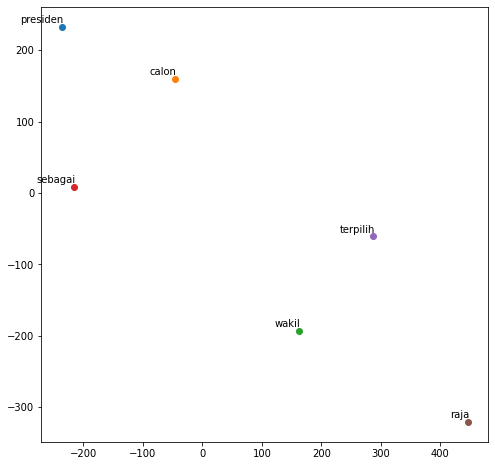

In [51]:
vocab = ["presiden", "calon", "wakil", "sebagai", "terpilih", "raja"]

def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model.word_vectors[model.dictionary[word]])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(glove)